#  일원 배치 분산분석 실습
- Python 에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자 

* 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다. 
- 귀무가설(H0): 세 가지 종에 대해 Sepal.Width의 평균은 모두 같다. 
- 대립가설(H1): 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다. 

--------------------------
<b>1. 분산분석</b>

In [2]:
import scipy.stats as stats  
import pandas as pd

Iris_data = pd.read_csv("C:/adp/data/iris.csv")
Iris_data.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Iris_data["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
Iris_data["target"].value_counts()

In [4]:
Iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

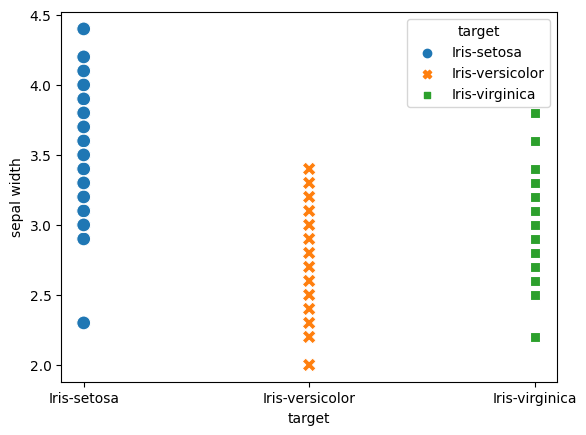

In [6]:
 
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot by Groups

sns.scatterplot(x='target', 

                y='sepal width', 

                hue='target', # different colors by group

                style='target', # different shapes by group

                s=100, # marker size

                data=Iris_data)

plt.show()



In [7]:
Iris_data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
target_list=Iris_data["target"].unique()

In [9]:
target_list

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
setosa = Iris_data[Iris_data["target"]==target_list[0]]["sepal width"]
versicolor = Iris_data[Iris_data["target"]==target_list[1]]["sepal width"]
virginica = Iris_data[Iris_data["target"]==target_list[2]]["sepal width"]

In [11]:
type(setosa)

pandas.core.series.Series

In [13]:
## 결과에서 첫번째 값은 검정통계치w이고, 두번째 값은 p-value입니다. 
## 정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단할 수 있습니다 
##a = df_iris[(df_iris['target'] == 'setosa') & (df_iris['sepal length (cm)'] > 5.5)]

print(stats.shapiro(setosa))

print(stats.shapiro(versicolor))

print(stats.shapiro(virginica))
    

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [14]:
## shapiro test 결과 0.07>0.05 이므로 정규성을 만족함으로 등분산 검정 시행
## 귀무가설 : 집단간 분산이 같다.
## 대립가설 : 적어도 두 집단간 분산이 다르다. 

stats.levene(setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

<b>P-value가 유의수준(0.05) 보다 크기 때문에 귀무가설 채택하여 세 집단간 분산이 같다고 할 수 있다. </b>


In [15]:
## LeveneResult : 등분산성 검정 완료  ->  ANOVA분석 시행 
## 귀무가설(H0): 세 가지 종에 대해 Sepal.Width의 평균은 모두 같다.
## 대립가설(H1): 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다.

stats.f_oneway(setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

<b>P-value가 유의수준(0.05) 작기 때문에 귀무가설을 기각하고 대립가설을 채택하여 적어도 세 집단 중 하나는 평균이 다르다고 할 수 있다. 

In [17]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<b>2. 사후검정</b>
- 그렇다면, 세 가지 종들 중 특히 어떠한 종들 간에 꽃받침의 폭에 차이가 있는지를 파앗하기 위해 사후검정을 수행해보자 

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = Iris_data["sepal width"], groups = Iris_data["target"] )

In [26]:
mc

In [27]:
tuekeyhsd = mc.tukeyhsd(alpha=0.05)

In [28]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


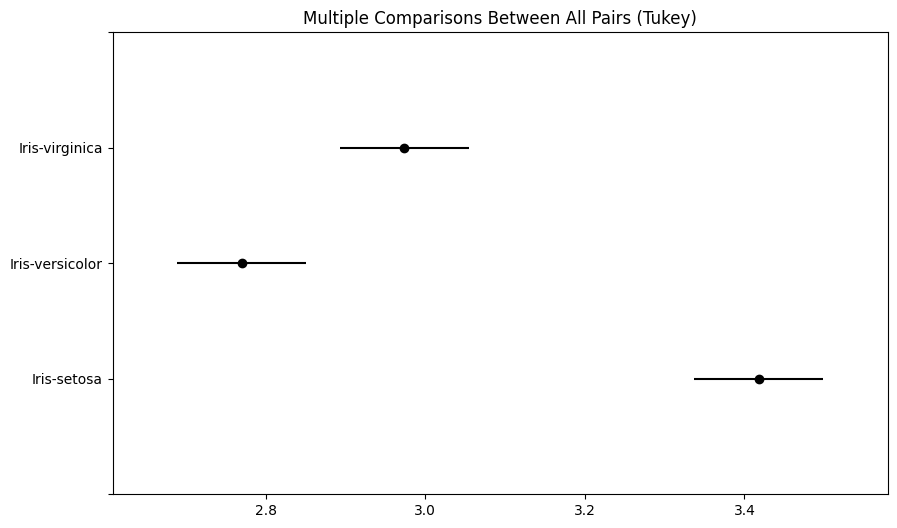

In [23]:
fig = tuekeyhsd.plot_simultaneous()

* 사후분석에서는 귀무가설을 "집단들 사이의 평균은 같다" 로 두고 대립가설을 "집단들 사이의 평균은 같지 않다" 로 둔다. 
 - 그리고 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중비교를 수행한다. 
 - 예제의 사후분석 결과를 살펴보면 Iris-setosa	Iris-versicolor	Iris-virginica	의 세 가지 비교에 대해서 모두 수정된 p-value값(p adj) 이 0.05보다 작으므로, 각각의 비교에 대한 귀무가설을 모두 기각한다. 
   즉, 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다. 
 - 또한 diff는  차이(오른쪽 집단 - 왼쪽 집단)값 을 나타내는데 setosa - versicolor 에 대한 diff 값은 음수이므로, versicolor일 때보다 setosa일 때 꽃받침의 폭이 통계적으로 유의하게 큰 값을 가진다고 해석할 수 있다. 

## 추가 함수 사용방법 예시 

### 정규성을 만족하지 않을 때

In [33]:
stats.kruskal(setosa, versicolor, virginica)
# 유의확률이 0.000 이므로 유의수준 0.05 에서 품종에 따라 꽃잎의 길이에 통계적으로 유의한 차이가 나타남.

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

### 등분산성을 만족하지 않을 때

In [34]:
# !pip install pingouin 
# !conda install pingouin
import pingouin as pg


welch_anova(data=None, dv=None, between=None)
    One-way Welch ANOVA.
    
    Parameters
    ----------
    data : :`pandas.DataFrame`
     
    dv : string
       종속변수를 포함하는 column 이름, (수치형) 
       
    between : string
       독립변수를 포함하는 column이름 (범주형) 

In [35]:
pg.welch_anova(data = Iris_data, dv = 'sepal width', between='target')
# 유의확률이 0.000 이므로 유의수준 0.05 에서 품종에 따라 꽃잎의 길이에 통계적으로 유의한 차이가 나타남.

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [36]:
# [Python] 분산 분석(ANOVA) : feat.크루스칼-왈리스 순위합 검정- (2)
# https://junsik-hwang.tistory.com/27



SyntaxError: invalid syntax (3800531421.py, line 1)